(1001, 6) (6, 1001)
(1001, 6) (6, 1001)


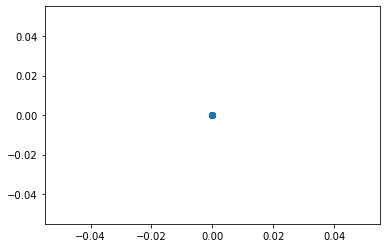

In [10]:
#!/usr/bin/env python
# coding: utf-8

# In[141]:


#!/usr/bin/env python
# coding: utf-8
from __future__ import print_function




import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
import quadrotor
import math



robot = quadrotor.Quadrotor()
horizon_length = 1000
N = 1000
u_ = robot.mass*robot.g/2
z0 = np.array([1,0,0,0,0,0]).reshape([6,])
u0 = u_ * np.ones([2,1])
o = (2*math.pi/10)
r = 1
T = 10


x_desired = [0 for i in range(0,N+1)]
y_desired = [0 for i in range(0,N+1)]
vx_desired = [0 for i in range(0,N+1)]
vy_desired = [0 for i in range(0,N+1)]
theta_desried = [0 for i in range(0,N+1)]
omega_desried = [0 for i in range(0,N+1)]

# v = 1/10
# v= v
# x_desired = [v*i*T/(N) for i in range(0,N+1)]
# y_desired = [v*i*T/(N) for i in range(0,N+1)]
# vx_desired = [v for i in range(0,N+1)]
# vy_desired = [v for i in range(0,N+1)]
# theta_desried = [0 for i in range(0,N+1)]
# omega_desried = [0 for i in range(0,N+1)]



state_desired = np.array([x_desired,vx_desired,y_desired,vy_desired,theta_desried,omega_desried])
ref_traj = state_desired.T
print(ref_traj.shape,state_desired.shape)



z0 = np.zeros_like(state_desired[:,0])
u_init = [(robot.mass * robot.g / 2) * np.ones([2]) for _ in range(horizon_length)]
print(ref_traj.shape,state_desired.shape)

plt.figure()
plt.scatter(x_desired,y_desired)

plt.show()



# In[142]:


In [11]:




A, B = robot.get_linearization(np.zeros(6),u0,0) 
A, B

(array([[ 1.    ,  0.01  ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  1.    ,  0.    ,  0.    , -0.0981,  0.    ],
        [ 0.    ,  0.    ,  1.    ,  0.01  ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  1.    ,  0.01  ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ]]),
 array([[ 0.   ,  0.   ],
        [-0.   , -0.   ],
        [ 0.   ,  0.   ],
        [ 0.02 ,  0.02 ],
        [ 0.   ,  0.   ],
        [ 0.015, -0.015]]))

In [25]:
Q = np.diag([1, 1, 1, 1, 1, 1])
R = np.diag([0.01, 0.01])
P_last = Q


while True:
    Pnew = Q + A.transpose().dot(P_last).dot(A) - A.transpose().dot(P_last).dot(B).dot(np.linalg.inv(B.transpose().dot(P_last).dot(B)+R)).dot(B.transpose().dot(P_last).dot(A))
    err = Pnew.reshape(-1) - P_last.reshape(-1)
    err = np.sum(err @ err.T)
    if err < 0.00011:
        break
    else:
        P_last = Pnew

K = -np.identity(2).dot(np.linalg.inv(B.transpose().dot(P_last).dot(B)+R)).dot(B.transpose().dot(P_last).dot(A))

In [26]:
%%time

def lqr_controller(state,i):
    ut = K.dot(state) + u_init[0]
    return ut.T
t, state, u = robot.simulate(z0,lqr_controller, horizon_length, disturbance = True)



Wall time: 21 ms


<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAARjltZGF0AAACoQYF//+d
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg
LSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg
LSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg
bWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n
ZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg
ZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhy
ZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy
YXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h
ZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr
ZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xv
b2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFw
bWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA4dZYiEABH//veIHzLL
afk613IR560urR9Q7kZxXqS9/iAAAAMAAAMAAOSq/2+9Zj+im+AAABXQArISJA0agX3rQrxAFVDm
jgk//Zy6/Zkysf1BBlzSMecs0adU4czxdWu3ATn6Hlfa1lvTJVwFeJzzgStuUpMltOrgd3xiXeRy
NijQbA3SBfm/fv33UGxcJxjDaZrIZWJfsESDGQ+3B//+mxNP94N7yss6aV0xf5e1Y3eMSRhlnOEg
5t6laqwn4ehgEZ2RN/0//u4oRdcLYjvj7rDRnH5cb7OVcdDvkrS7d1iuQntkgBIeCFmbpJmuZT07
5S20WbssMYxQ2cNEoMy6b5kGTgagfTCz/Xrd63idN3yGKPuyjMak4z1+ERROIN7QcJLRBeyczXWA
A7vd0/uqGZCsU1JENiur5JXUSTWG8AbzTqHWfystnVrmFTf2F5GrajXDp3O6DQjrMIQwPGZ36Qc3
7fHCUyVlyXNFevPZ5+BPa3oA4FEjHO9bGX6VOKf3AO9FqDvaDVUt6MPi0vtZGgyZSX/Clm//Yi6a
uTF+nfR8TwVE+jb/CkU0nALEVn0Bs9juzxaH02BfJgWBl8jszktpHx8Xl2b/zeXY42Ev7IGT2mwv
/HaSN2KGaSfceLok+/5bhZC986W7e31N1cr/Af7+FSy7i+S64vwjDhIgMMkFqQjyuW/KNLo0jivK
r+DPwgx5xScBNP5GD2vQwMkSPZhcLoR8CqPc+VbvOiSPwJ3x8Zwxe5BQTD8Z4HLkKAcSAVvZp//m
bI9Nve29XgKId2mWj4gKeynjAjPaUv9+n98BChCv2eZiKoZBs91kkDGO5RpAR5GKyOMrrD3Pl9Hs
jdpKmZyN5ngAACA1AABrMo8BBVmnI64W1XwS6lSOBWI4qF3xMduZpVvunrLdLOgM1DQxPlFrqchk
1/ZCHm7CFSz8DUP99L+jzC9SZBZ/5enJMhCV+B9LzNibTQVjTCtC141/NZIykQTgNtVl/0HHd+HH
Sa829aE/t3bq1ZKkh6c9epEr/2AlFoUBrjfUVLWrfHM/KQodaOJ4fMhGQu8LNe65VNnxk0Tgjg4Y
4u/Qrm796/Mosfraw5ytVUybDsABShCRmjp3PlU+G9ezo82xV9fAVmwZpyEL43TQDI7n32nwp+WW
EbhxgjL8P9FCCC13/n314JqFrJm7qLcUytFhvkPV8VPfV+WgN7++lxfcX0uGhVV/ThwBPXBg4fkv
Pgs7++CXWk9uEnMWmcZ8uDAAl/lBsfNxWySUPb5G8/pkhvnr6oc51DD3vopHmGRGepHnkWbaGC7s
cJ8Kn8gxtihjjid5Px+X6dslIHAMsHYw8fi+p//3MnNZN0LFjnS2ewx59TO1xkSgP98cdFrDIr+D
uK5FL4vQbUHMCf2/Pc7Skq3AZ7EiataLSwQAmTWyXs6/Ves78vGT3Q4tRegAPPP/PkLgyvSeoaef
JGuLKvkDKVs3qgyFXGzRwXlp9a8dB4yont3HmjaSPlCMRms/QGd3u8H2KBZgKaSFQgX/jOPzKE7z
cUvTAH1q2KbBAGTQd0U5kB1DU53kc0vUFrOQnu8/4+B19v5qqPT/um/K7OdvY+gUCtgrOoRL5oyA
UHlGPpuZqOGcJe6JgAF2Ug1mQeAAitgAXZA4XVczLrPJesgzgCKf7eMFQNVaEtaEVt6oBc2rDTFp
r6hEQYbxZw0httslGhE109WeVXXcG0Syr0tONcizSPO6mz1ol+z/qWjbAD33Js+JMkw1PDSXGHJB
4zFH8SV03GxJNA6J9R2EeHf++S8Nofu30P4c6853WqY8DwiHj/MMlcI8jUSlRFyYgNYxoQpNIqyA
mE5UjSL+ILSaFmHs2ywRG4duEqUybUq2ZwtEgt/OwpthtjsYYhGeD85yUu6tECD2oR9uKTPEsXD7
ZtRkwwT+BnZ/FErPnAdHu2YVOCNG9g10msyP7rUUyP+8L4eT3498m0PEkbk/5tiuN+3nRmaFbfTR
NGwFOgo7QAQxPshpY19c2QCwor2gPAzbHCdLFiJzBSQaZE86jpdExZIa32oRq504oFdTtCs2rLkO
hXsYQ6TGAXZrE3Kgf2dNtjkFO1ybSUlSVHDDR/k3a+MLp5T/5WVjGPaapEHOv23m37X6EhnI6PDr
ke266P0/jX/uTIGlTDhiACvWobc+t7qIwRepJA8p6VLdFC/RMPA0MLmRuK0v67Rsjl91HWSRpQsU
D/PsNLXHMDye/3tMuKUPPFNIzOTHPF/+1S8ijkVW0hDQ8ZbGTkBZZhfGtXIEU2JLjExoxtmgr7Wp
YZ/sMigLwx+8OjTwAFYAAAjSMhynAP6qcY8TYlvv/snEHShC/5AGnVVVqBvtuTvAkRBHNU4rhww+
I7lPczBP7hqJryYJ2W/nO5McRU1So9oq107vwXXn9AdT+l2pnhzXZnQgLG6UqDlVn6BDZM0SCoDp
F1zhLI6yxu+N+lZC922CJEcMOHur3d6s25b066ygesmZyUiGMoiokU1XjIBLgLmV/XC1QTM/frJp
VXzoHPrN77Hkxw8u7okk702sWdQD0AuF/A2aTe8LHkdpJNDwVg8xcjn6O4nYPItJKsK2U9A+JLPK
Rd7cmTgjYfLSgVc48MA7Xal+Sebfm619xZ67NPbYEdWfIYpvcOXrXaLwsTxK6flwtlUGU3Ifkof4
mFNlHJwk2iyGOZF9A9OjuiT+PIjIJ2ACL9L7G4KYYNVABrWnYOlXFFqEfLDCKCJltIVWr+v3A5h9
v0bZNJd8GRsa+ES6lFOPMM28BWz/sHhpiEDWLxqEqLFDNtJgOFVbe6Dbzk/dr4ZxymH4hd3LMopq
snR0hamZq5s2ohmFUaRrYIa1XeIZMvMenxUKqXNupnDx2jJrFYq+pRTP84QDEVRJSTrUBInT+Ggk
dgTKCHIM29wwVHzUaM7Uj

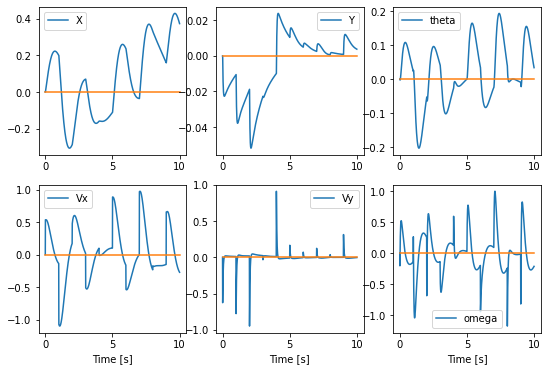

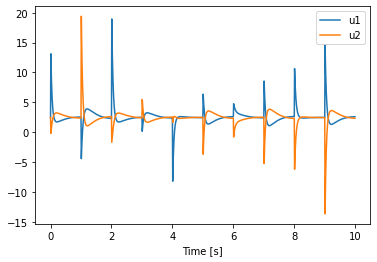

In [27]:

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.plot(t, state_desired[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.plot(t, state_desired[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.plot(t, state_desired[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.plot(t, state_desired[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.plot(t, state_desired[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.plot(t, state_desired[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')
robot.animate_robot(state,u)